In [7]:
!pip install opencv-python

    100% |████████████████████████████████| 39.7MB 797kB/s ta 0:00:011


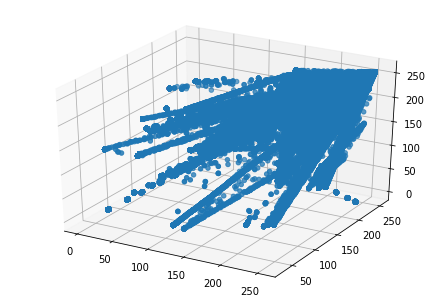

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

#read image
img = cv2.imread('./IMG/Bangkok_map.PNG')

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [10]:
import cv2
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

img = './IMG/Bangkok_map.PNG'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

[[229 229 228]
 [ 98 206 102]
 [240 116  72]
 [174 212 222]
 [ 97 114 130]]
